# ML Intermediate Project - GCD - Shalini

## Table of Content:


1. <a href='#section1'>Problem Statement</a>

2. <a href='#section2'>Data Loading and Description</a>

3. <a href='#section3'>Exploratory Data Analysis</a>

4. [Model Evaluation](#Section4)

5. [Prediction using PCA,KNN,SVM Algorithms](#Section5)

6. [Conclusion](#lastsection)

## 1. Problem Statement

Given the dataset containing __Iris Species Data__, use PCA, KNN and SVM Algorithms to evaluate the multiple models. 

## 2. Data Loading and Description

The Iris dataset was introduced by the British statistician and biologist Ronald Fisher in his classic 1936 paper- "The Use of Multiple Measurements in Taxonomic Problems". 

It includes three iris species(Iris Setosa, Iris Virginica, Iris Versicolor) with 50 samples of each as well as some properties about each flower. 
Four features were measured from each sample : the length and the width of the sepals and the petals, in centimeters. 
One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

The columns in this dataset are:

    Id
    SepalLengthCm
    SepalWidthCm
    PetalLengthCm
    PetalWidthCm
    Species
    

__Importing Packages__

In [2]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, LinearSVC, SVR

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

__Importing the Dataset__

In [3]:
iris = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Iris.csv')
iris.head()
                   

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Exploratory Data Analysis (Pre-Processing & Cleaning of Data)

__Checking the Shape of the Dataset__

In [4]:
iris.shape

(150, 6)

__Checking for the features/columns present in the dataset__

In [5]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

__Checking the INFO of the dataset provided__

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


__Checking if any missing value field is present in our dataset__

In [7]:
iris.isnull().sum()[iris.isnull().sum() !=0]

Series([], dtype: int64)

__Drop The ID column and Encode the Species column__

In [8]:
iris = iris.drop('Id', 1)               # ID column is not necessary for our evaluation, hence we can drop it

In [9]:
le = LabelEncoder()
iris.Species = le.fit_transform(iris.Species)

In [10]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### From the above modified dataset we can see that the Species have been encoded now :

Setosa - 0
Virginica - 1
Versicolor - 2

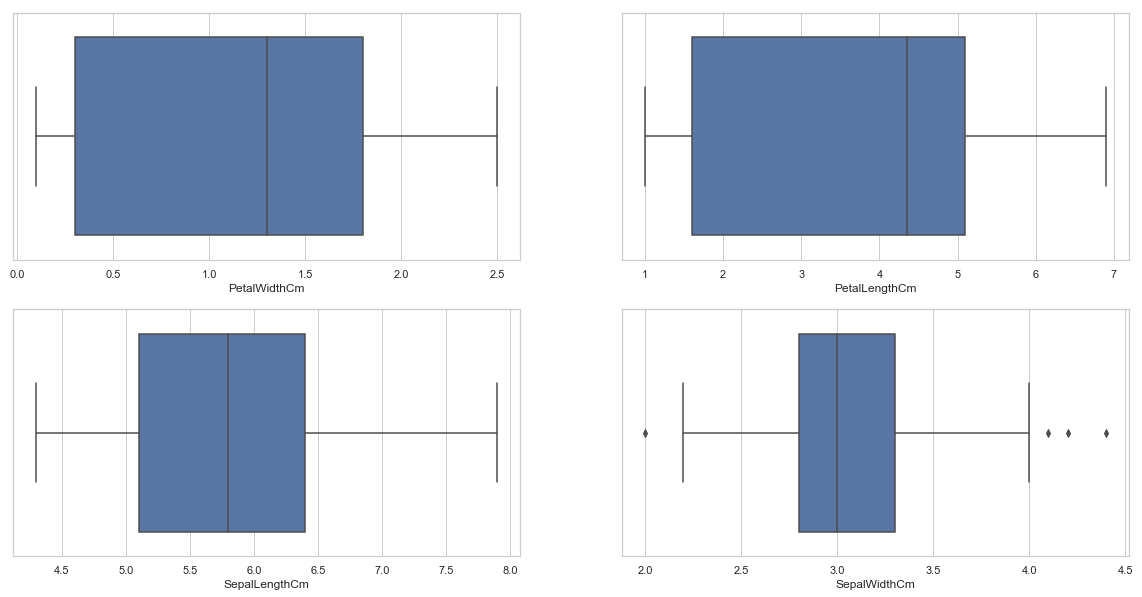

In [13]:
f = plt.figure(figsize=(20,10))
f.add_subplot(221)
sns.boxplot(x=iris['PetalWidthCm'])
f.add_subplot(222)
sns.boxplot(x=iris['PetalLengthCm'])
f.add_subplot(223)
sns.boxplot(x=iris['SepalLengthCm'])
f.add_subplot(224)
sns.boxplot(x=iris['SepalWidthCm'])

In [14]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
iris.groupby('Species').size()

Species
0    50
1    50
2    50
dtype: int64

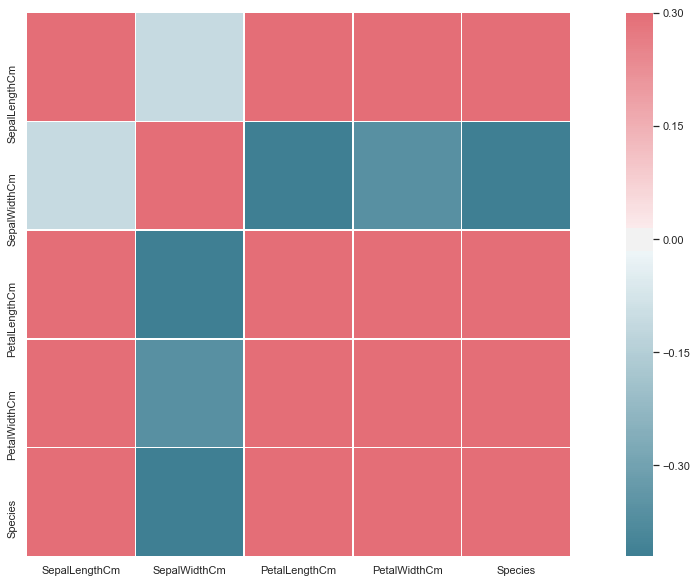

In [23]:
corr = iris.corr()
f, ax = plt.subplots(figsize=(20, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=0.3, center=0,square=True, linewidths=0.5)

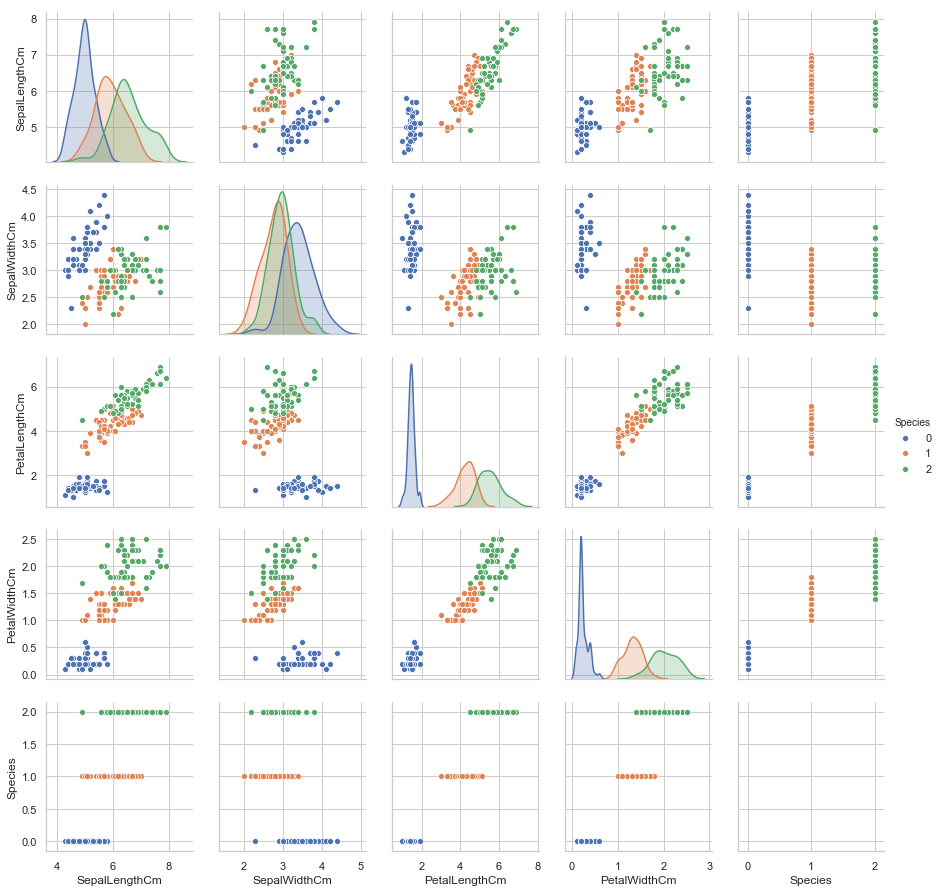

In [25]:
sns.pairplot(data=iris,kind='scatter',hue='Species')

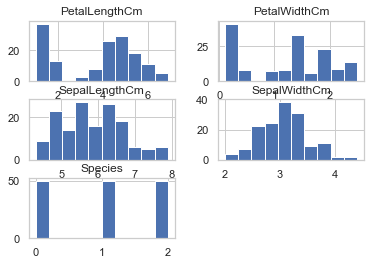

In [26]:
iris.hist()
plt.show()

### CORRELATION between the attributes

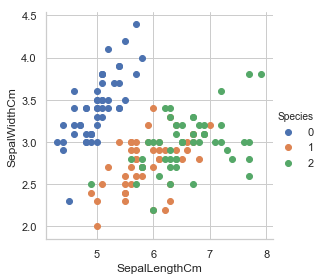

In [38]:
sns.FacetGrid(iris, hue="Species", height=4) \
.map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
.add_legend();
plt.show();

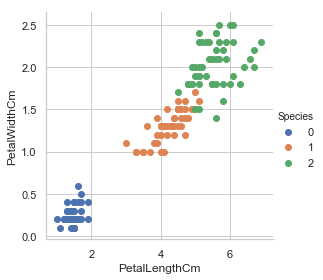

In [39]:
sns.FacetGrid(iris, hue="Species", height=4) \
    .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
    .add_legend();
plt.show();

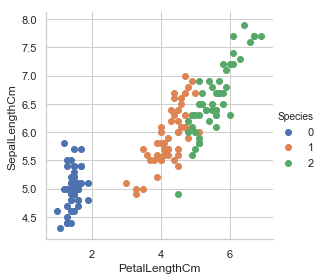

In [40]:
sns.FacetGrid(iris, hue="Species", height=4) \
    .map(plt.scatter, "PetalLengthCm", "SepalLengthCm") \
    .add_legend();
plt.show();

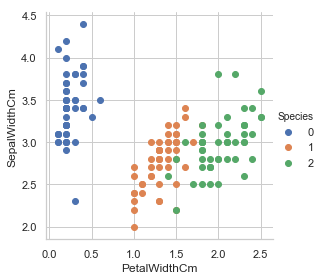

In [41]:
sns.FacetGrid(iris, hue="Species", height=4) \
    .map(plt.scatter, "PetalWidthCm", "SepalWidthCm") \
    .add_legend();
plt.show();

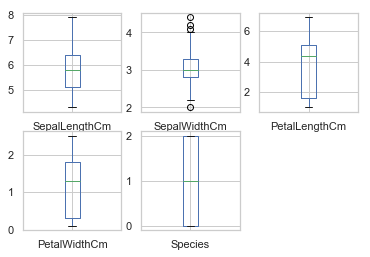

In [45]:
iris.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

## Conclusion drawn from the EDA :

1. Our Dataset has three IRIS species , namely : Iris-setosa, Iris-versicolor and Iris-virginica with 50 samples of each.


2. Using SepalLengthCm and SepalWidthCm correlation, 
    * Setosa flowers can be distinguished from the other two Species.
    * It is difficult to differentiate Versicolor from Viginica as they have considerable overlap
    
    
3. Using Correlation between PetalLengthCm and PetalWidthCm features, 
    * All the three flower species can be easily differentiated 
    
    
4. From the correlation Heatmap we can conclude that all features have either strong positive or negative correlation with the  Species that we want to classify.

## 4. Model Evaluation

__Preparing X and Y using Pandas__

In [47]:
array = iris.values
array

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [48]:
X = array[:,0:4]
y = array[:,4]

__Split X and Y into Train and Test DataSet__

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

__Checking the shape of X and Y training Dataset__

In [50]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


__Checking the shape of X and Y testing Dataset__

In [51]:
print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)


### a.) Logistic Regression Model

In [53]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

C:\Users\Shalini\Downloads\Other_Stuff\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shalini\Downloads\Other_Stuff\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [54]:
y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)
print('Accuracy score using Logistic Regression is:', accuracy_score(y_test,y_pred_test))

Accuracy score using Logistic Regression is: 0.8


In [55]:
print (confusion_matrix(y_test, y_pred_test))

[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]


### b.) Decision Tree Classifier

In [56]:
param_grid = {'max_depth':range(1, 20, 2)}
DT = DecisionTreeClassifier()
clf_DT = GridSearchCV(DT, param_grid, cv = 10, scoring='accuracy', n_jobs = -1).fit(X_train,y_train)

C:\Users\Shalini\Downloads\Other_Stuff\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [57]:
y_pred = clf_DT.predict(X_test)
print ('Accuracy score using Decision Tree Classifier is:', accuracy_score(y_test,y_pred))

Accuracy score using Decision Tree Classifier is: 0.9


In [59]:
print('Confusion matrix for test data with Decision Tree is:\n',confusion_matrix(y_test, y_pred))

Confusion matrix for test data with Decision Tree is:
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]


### c.) Random Forest Classifier 

In [60]:
model1 = RandomForestClassifier(random_state = 0)

In [61]:
#fitting the Model on X_train and Y_train
model1.fit(X_train,y_train)

C:\Users\Shalini\Downloads\Other_Stuff\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [62]:
#Using the Model for Prediction
prediction1 = pd.DataFrame()
prediction1 = model1.predict(X_test)

In [63]:
print ('Accuracy score using Random Forest Classifier is:', accuracy_score(y_test, prediction1))

Accuracy score using Random Forest Classifier is: 0.8666666666666667


### d.) Random Forest Regressor

In [64]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

C:\Users\Shalini\Downloads\Other_Stuff\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
predictions = rf.predict(X_test)
MAE_test = mean_absolute_error(y_test, predictions)
RMSE_test = np.sqrt(mean_squared_error(y_test, predictions))

print('MAE for test data set is {}'.format(MAE_test))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for test data set is 0.13333333333333333
RMSE for test set is 0.32557641192199416


## 5. Prediction using PCA, KNN, SVM Algorithms

### a.) Principal Component Analysis ( PCA)

In [66]:
pca = PCA(0.95).fit(X)

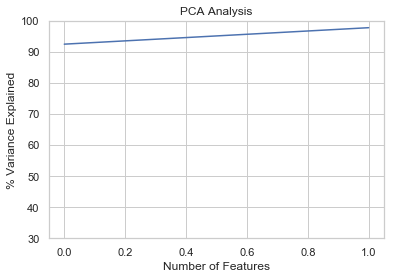

In [70]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [72]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

2 components explain 95% of the variation in data


In [73]:
pca = PCA(n_components=2, random_state = 0)
X = pca.fit_transform(X)
print(X.shape)

(150, 2)


In [74]:
# Splitting X and Y into Train and Test DATASET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [75]:
#Checking the shape of X and Y train DATASET

print(X_train.shape)
print(y_train.shape)

(120, 2)
(120,)


In [76]:
# Checking the shape of X and Y test DATASET

print(X_test.shape)
print(y_test.shape)

(30, 2)
(30,)


__Random Forest Regressor__

In [77]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

C:\Users\Shalini\Downloads\Other_Stuff\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [78]:
predictions = rf.predict(X_test)
MAE_test = mean_absolute_error(y_test, predictions)
RMSE_test = np.sqrt(mean_squared_error(y_test, predictions))

print('MAE for test data set is {}'.format(MAE_test))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for test data set is 0.14666666666666667
RMSE for test set is 0.35023801430836526


__Random Forest Classifier__

In [79]:
model1 = RandomForestClassifier(random_state = 0)

In [80]:
#Fitting the Model on X_train and Y_train

model1.fit(X_train,y_train)

C:\Users\Shalini\Downloads\Other_Stuff\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [81]:
#Prediction 

prediction1 = pd.DataFrame()
prediction1 = model1.predict(X_test)
print ('Accuracy score for Random Forest Classifier is:', accuracy_score(y_test, prediction1))

Accuracy score for Random Forest Classifier is: 0.8


### b.) KNN Model

In [82]:
array = iris.values
X = array[:,0:4]
y = array[:,4]

In [83]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) 

#Splitting X and Y into Train and Test Dataset

In [85]:
knn = KNeighborsClassifier()

In [86]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [87]:
y_preds = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.9333333333333333


In [88]:
MAE_test = mean_absolute_error(y_test, predictions)
RMSE_test = np.sqrt(mean_squared_error(y_test, predictions))

print('MAE for test data set is {}'.format(MAE_test))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for test data set is 0.14666666666666667
RMSE for test set is 0.35023801430836526


### c.) K-Neighbors Regressor

In [89]:
array = iris.values
X = array[:,0:4]
y = array[:,4]

In [90]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

#Splitting X and Y into train and test Dataset

In [92]:
# Instantiating learning model (k = 3)
regressor = KNeighborsRegressor(n_neighbors=3)

# Fitting the model
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_preds = regressor.predict(X_test)

In [93]:
# creating the list of K for KNN

k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

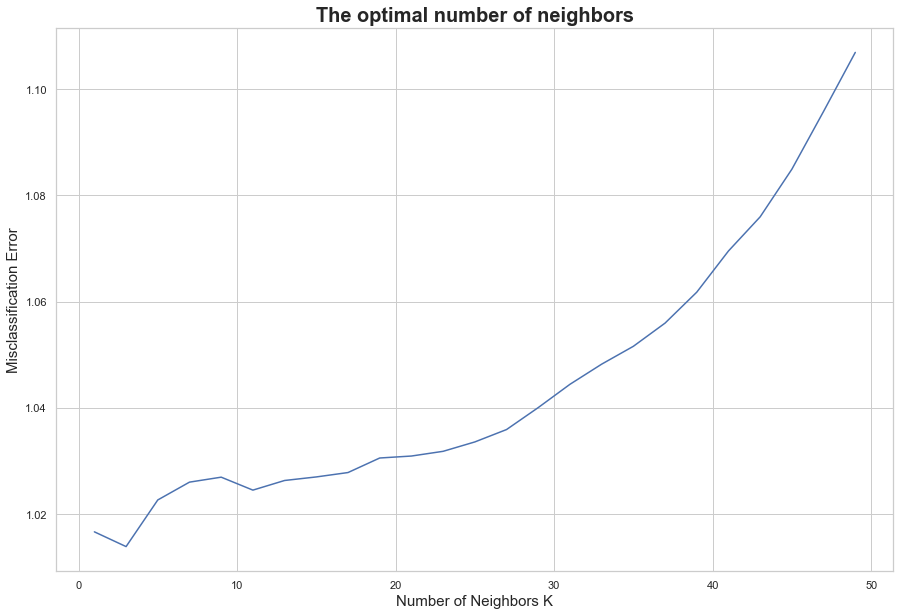

In [94]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [95]:
# finding best k

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


### d.) Support Vector Machine ( SVM ) 

In [96]:
array = iris.values
X = array[:,0:4]
y = array[:,4]

In [97]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [98]:
# Splitting X and Y into Train and Test Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

__SVR__

In [99]:
clf = SVR(C=0.8, epsilon=0.2, kernel='poly')

In [100]:
clf.fit(X_train, y_train)

C:\Users\Shalini\Downloads\Other_Stuff\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=0.8, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
Y_predict = clf.predict(X_test)
print('Accuracy of SVR on training set: {:.2f}'.format(clf.score(X_train, y_train) * 100))
print('Accuracy of SVR on test set: {:.2f}'.format(clf.score(X_test, y_test) * 100))

Accuracy of SVR on training set: 79.95
Accuracy of SVR on test set: 74.99


__Linear SVC__

In [102]:
clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
clf.fit(X_train,y_train)

C:\Users\Shalini\Downloads\Other_Stuff\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [107]:

Y_predict = clf.predict(X_test)

In [108]:
print('Accuracy of SVR on training set: {:.2f}'.format(clf.score(X_train, y_train) * 100))
print('Accuracy of SVR on test set: {:.2f}'.format(clf.score(X_test, y_test) * 100))

Accuracy of SVR on training set: 96.67
Accuracy of SVR on test set: 86.67


__SVC__

In [109]:
clf_SVC = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
clf_SVC.fit(X_train,y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=0)

In [110]:
Y_predict = clf_SVC.predict(X_test)

In [111]:
print('Accuracy of SVR on training set: {:.2f}'.format(clf_SVC.score(X_train, y_train) * 100))
print('Accuracy of SVR on test set: {:.2f}'.format(clf_SVC.score(X_test, y_test) * 100))

Accuracy of SVR on training set: 98.33
Accuracy of SVR on test set: 90.00


## 6. Conclusion

1. PCA doesnt seem to have much impact due to the lesser number of components and less variance.

2. The optimal number of neighbors in KNN algorithm is 3.

3. The accuracy of KNN model is 93%.

4. SVC Model (SVM) has higher accuracy for training set data , but for test data it is only 90%.

Hence, __KNN Model__ can be considered __as the best Algorithm for prediction__ as far as this dataset is concerned.